In [22]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

from common import *
from ydj.analysis_tools import *

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Load dataset

In [2]:
data = pd.read_csv(join(PATH.input, 'train_data.csv'))
print(len(data))
data.head()

3859200


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [9]:
MARKER = -9999
IN_SEQ_LEN = 2 * 144
OUT_SEQ_LEN = 2 * 144
STRIDE = 144
SHUFFLE = False
TEST_SIZE = 0.2
BATCH_SIZE = 256

In [13]:
def custom_preprocess(data):
    # 1. Generate time
    data_with_time = generate_full_timestamp(data)
    
    # 2. Imputing
    data_imp = impute_data(data_with_time)

    # 3. Mark anomaly
    data_mark = marking_data(data_imp, MARKER)
    
    # 4. Feature engineering
    data_fe = preprocess(data_mark)
    cols = select_features(data_fe)
    return data_fe[cols]

In [14]:
%%time
data_pp = custom_preprocess(data)

Number of Nan values: 0


In [16]:
data_pp

,TurbID,Time,WspdX,Bspd2,Bspd3,RPM,Bspd1,TSR3,TSR2,TSR,TSR1,Pab3,Pab2,Pab,Pab1,Papt,Patv
0,1,1,6.155045,16.034441,16.034441,16.034441,16.034441,2.605089,2.605089,2.605089,2.605089,1.00,1.00,1.00,1.00,494.660063,494.66
1,1,2,6.155045,16.034441,16.034441,16.034441,16.034441,2.605089,2.605089,2.605089,2.605089,1.00,1.00,1.00,1.00,494.660063,494.66
2,1,3,6.265462,16.322087,16.322087,16.322087,16.322087,2.605089,2.605089,2.605089,2.605089,1.00,1.00,1.00,1.00,509.760056,509.76
3,1,4,6.419479,16.723314,16.723314,16.723314,16.723314,2.605089,2.605089,2.605089,2.605089,1.00,1.00,1.00,1.00,542.530062,542.53
4,1,5,6.249246,16.279842,16.279842,16.279842,16.279842,2.605089,2.605089,2.605089,2.605089,1.00,1.00,1.00,1.00,509.360052,509.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859195,134,28796,4.843796,13.300998,13.300998,13.300998,13.300998,2.745986,2.745986,2.745986,2.745986,0.01,0.01,0.01,0.01,327.042687,308.65
3859196,134,28797,4.449136,12.217265,12.217265,12.217265,12.217265,2.745986,2.745986,2.745986,2.745986,0.01,0.01,0.01,0.01,240.572254,221.60
3859197,134,28798,4.229996,11.615510,11.615510,11.615510,11.615510,2.745986,2.745986,2.745986,2.745986,0.01,0.01,0.01,0.01,247.042102,220.60
3859198,134,28799,4.335151,11.904266,11.904266,11.904266,11.904266,2.745986,2.745986,2.745986,2.745986,0.01,0.01,0.01,0.01,247.028873,222.15


# 2. Explore `Patv` time series

In [19]:
turbID = 1
times  = 144 * 10

targets = data_pp.query(f"TurbID == {turbID} and Time <= {times}")['Patv']

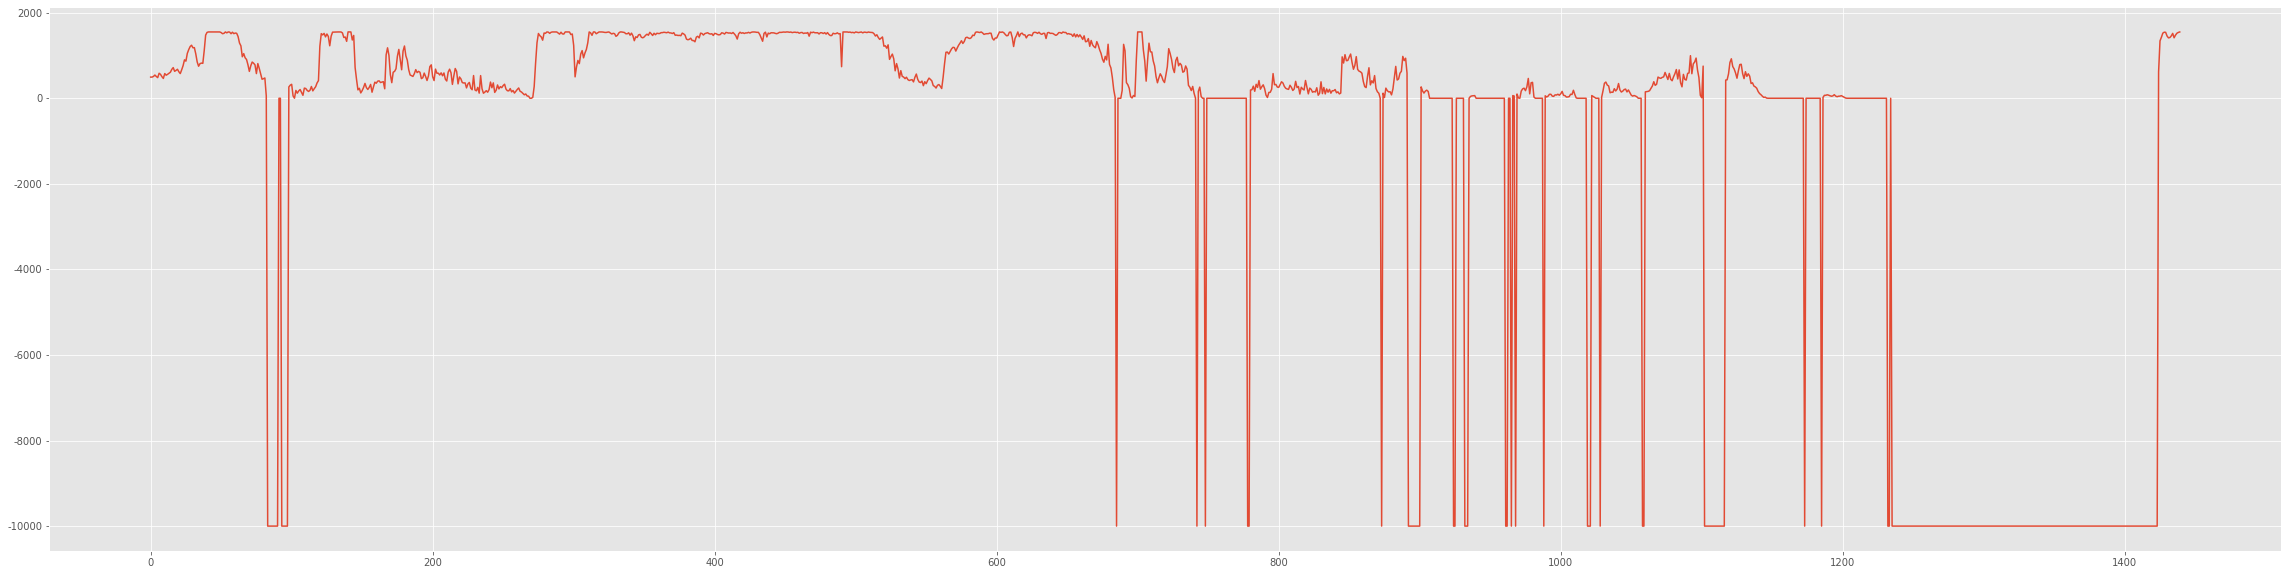

In [23]:
targets.plot(figsize=(40, 10));

# 3. Explore missing value

In [24]:
data = pd.read_csv(join(PATH.input, 'train_data.csv'))

In [52]:
data_time = generate_full_timestamp(data)

In [56]:
data_mark = marking_data(data_time, None)

In [57]:
data_mark

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,Time_in_day,Time
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66,2,2
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76,3,3
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53,4,4
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859195,134,200,23:10,4.86,4.68,9.04,10.40,174.39,0.01,0.01,0.01,-108.13,308.65,140,28796
3859196,134,200,23:20,4.46,-4.00,8.79,10.33,179.76,0.01,0.01,0.01,-93.64,221.60,141,28797
3859197,134,200,23:30,4.23,-0.08,8.74,10.22,172.35,0.01,0.01,0.01,-111.20,220.60,142,28798
3859198,134,200,23:40,4.36,-6.12,8.64,10.10,172.35,0.01,0.01,0.01,-108.04,222.15,143,28799


In [111]:
threshold = 6*12  # 12 hour

for turbID in data_mark['TurbID'].unique():
    data_tid = data_mark[data_mark['TurbID'] == turbID].set_index('Time')
    idxs = data_tid.isna().sum(axis='columns') > 0
    idxs_nan = idxs[idxs].index
    idxs_removed = []
    
    s, e = 0, 1
    while e < len(idxs_nan):
        cur = idxs_nan[s:e]
        if idxs_nan[e] == cur[-1] + 1:
            e += 1
        else:
            if len(cur) >= threshold:
                idxs_removed += list(cur)
            s = e
            e = s + 1
    else:
        if len(cur) >= threshold:
            idxs_removed += list(cur)
    
    print(len(idxs_removed))
    data_rm = data_tid.drop(idxs_removed).interpolate().fillna(method='bfill')
    break

956


In [203]:
from scipy.signal import savgol_filter
target = data_rm['Patv']
new_target = pd.Series(savgol_filter(target, 11, 3), index=target.index)

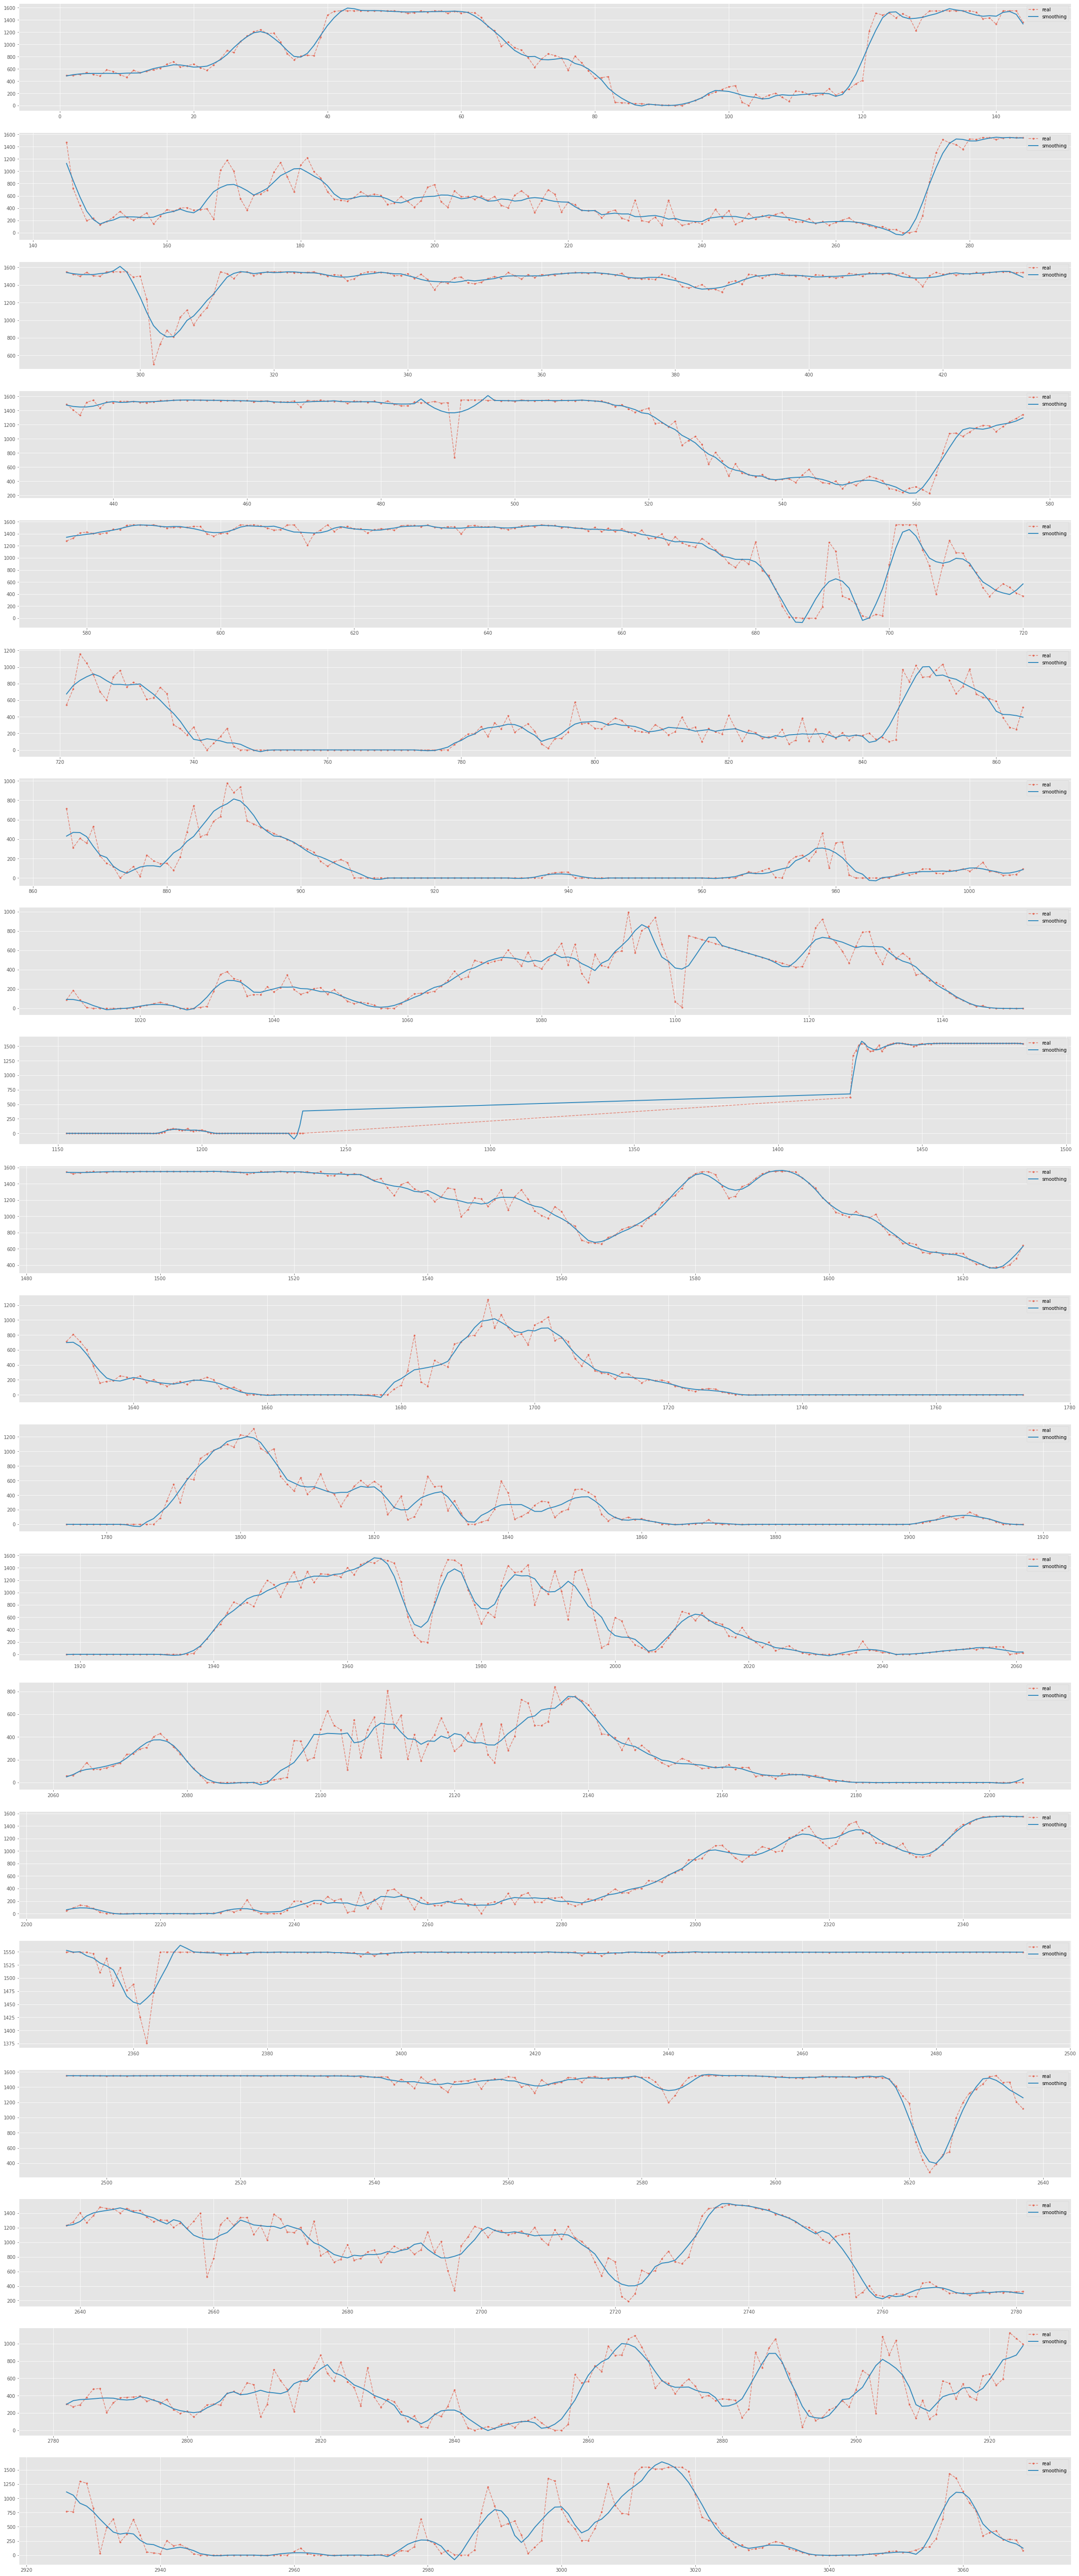

In [204]:
fig, axes = plt.subplots(20, 1, figsize=(40, 100))
for i, ax in enumerate(axes.flatten()):
    real = target[144*i:144*(i+1)]
    pred = new_target[144*i:144*(i+1)]
    ax.plot(real, '--.', alpha=0.6, label='real')
    ax.plot(pred, '-', linewidth=2, label='smoothing')
    ax.legend();

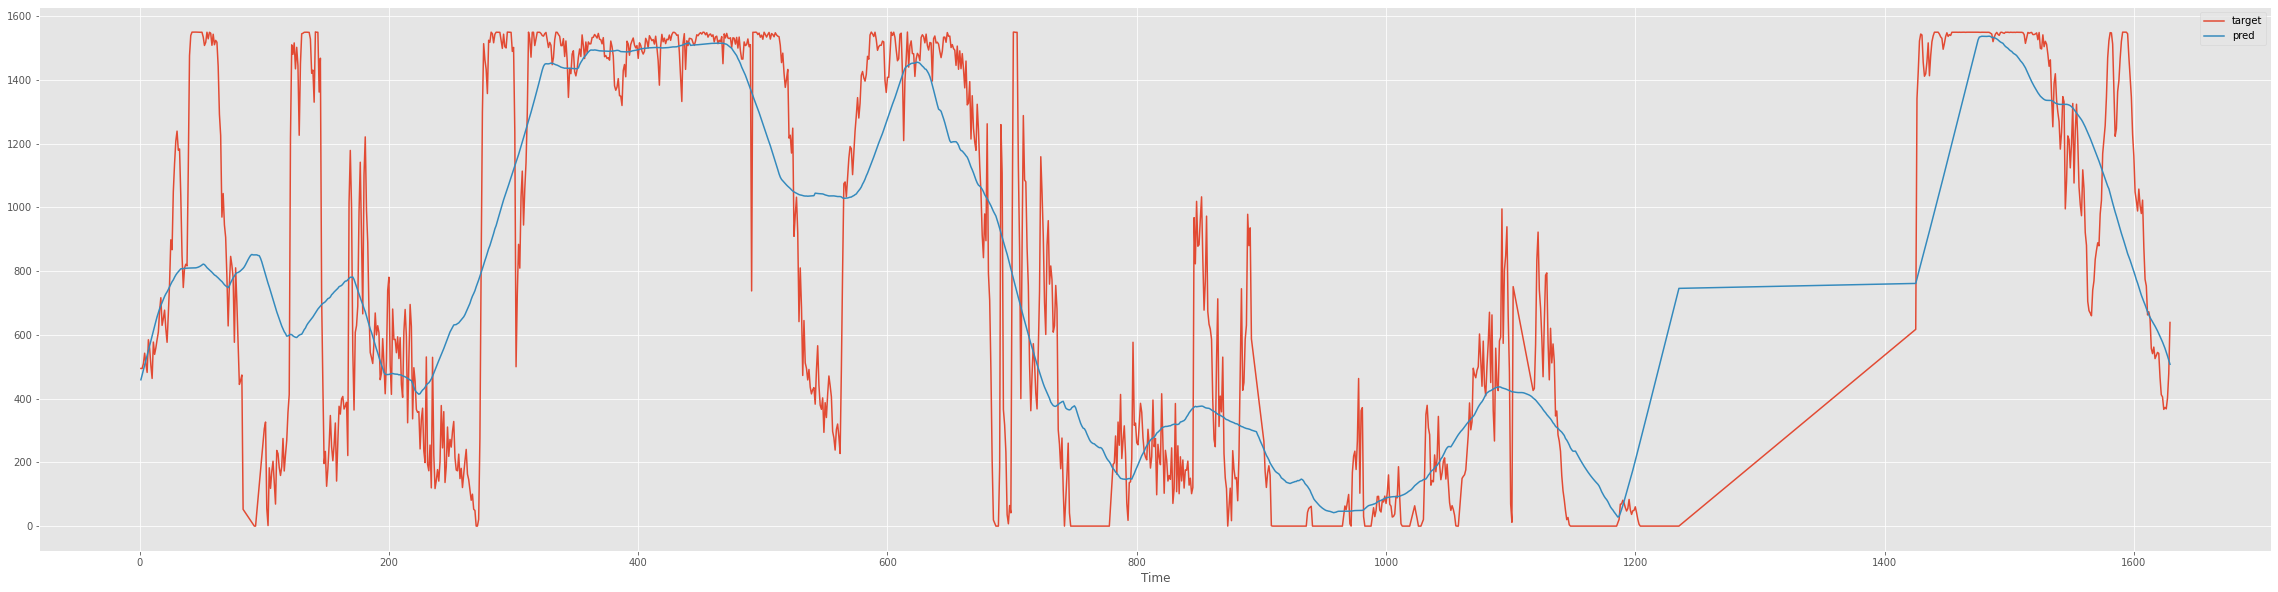

In [130]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

pd.DataFrame({'target': target, 'pred': smooth(target, 100)}).plot(figsize=(40, 10));

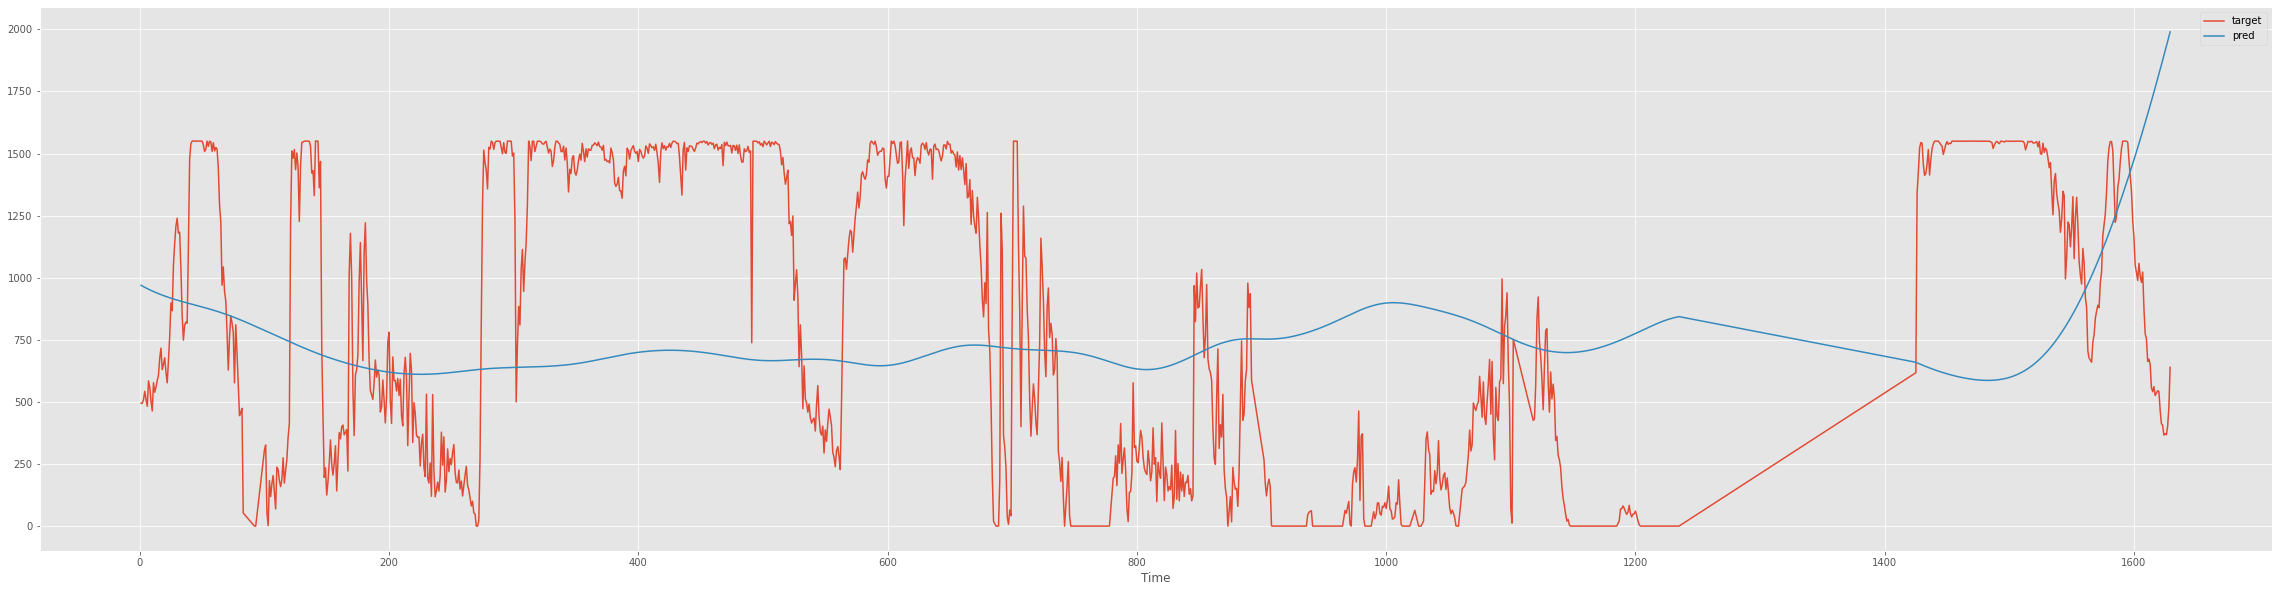

In [125]:
from statsmodels.nonparametric.kernel_regression import KernelReg
kr = KernelReg(target.index, target, 'c')
new_target, _ = kr.fit(target.index)

pd.DataFrame({'target': target, 'pred': new_target}).plot(figsize=(40, 10));